Assume we are observing a series of trials where an event happening with probability $p$ and we are interested the number of instances that event happens.  We can write this compactly in binomial distribution formulation, out of $n$ trials, event happens exactly $k$ times regardless of the order.

\begin{align}
P(\#=k) & = {n \choose k} p^k (1-p)^{n-k} \\
\end{align}

For example in 10 throws of a die, 6 appears exactly five times, $n=10, k=5, p=1/6$

In [2]:
"""Define prod function as a fold"""
from functools import reduce
import operator
def prod(xs):
    return reduce(operator.mul, xs, 1)

"""Define n choose k function without evaluating factorials"""
def nCr(n,k):
    t = min(k,n-k)    # to minimize fold operations
    if(t==0):
        return 1
    if(t==1):
        return n
    if(n<20):
        return prod(range(n-t+1,n+1))/prod(range(1,t+1))
    else:
        return prod([(n-i)/(i+1) for i in range(t)])
    

def binomProbability(n,k,p):
    return nCr(n,k) * pow(p,k) * pow(1-p,n-k)

Now armed with the functions we need, we can easily calculate the posed question

In [39]:
print(binomProbability(10,5,1/6))

0.013023810204237159


That is, it's around 1%. Since the difficult part is done, we can generate the probability distribution for all values of $k$

In [8]:
numOfThrows=10
p=1/6
for i in range(numOfThrows+1):
    print(i,binomProbability(numOfThrows,i,p))    # i iterates over 0..9

0 0.1615055828898458
1 0.3230111657796916
2 0.2907100492017224
3 0.15504535957425192
4 0.05426587585098817
5 0.013023810204237159
6 0.002170635034039526
7 0.00024807257531880297
8 1.860544314891022e-05
9 8.269085843960098e-07
10 1.6538171687920194e-08


The probability of getting exactly one 6 is almost 1/3. Perhaps will be more useful if we can show as a diagram.  But before, let's double check that all probabilities add up to 1.


In [11]:
eps=1E-10
values=range(numOfThrows+1)
distr=[binomProbability(numOfThrows,i,p) for i in values]
assert(abs(1-sum(distr))<eps)

In [12]:
import matplotlib
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

In [13]:
import numpy as np

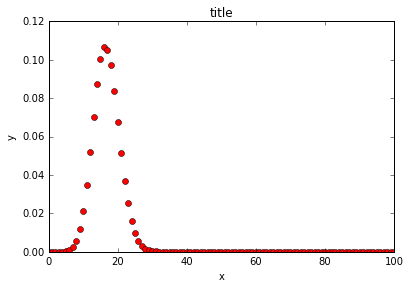

In [18]:
fig = plt.figure()
N=100;
axes = fig.add_axes([-0.1, -0.1, 0.8, 0.8])
values=range(N+1)
distr=[binomProbability(N,i,p) for i in values]

axes.plot(list(values), distr, 'ro')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

In [46]:
def exponentialProbability(k,lam):
    return pow(lam,k)/prod(range(1,k+1))*exp(-lam)

In [47]:
exponentialProbability(10,1)

1.0137771196302974e-07

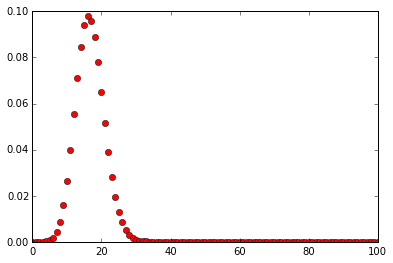

In [49]:
fig = plt.figure()
N=100;
axes = fig.add_axes([-0.1, -0.1, 0.8, 0.8])
values=range(N+1)
distr=[exponentialProbability(i,N/6) for i in values]

axes.plot(list(values), distr, 'ro')

When $N$ is very large, we can define a new variable $\lambda$ as $\lambda = Np.$ Rewriting the Binomial Distribution in terms of $\lambda$.

\begin{align}
P(\#=k) & = {n \choose k} (\frac\lambda{n})^k (1-\frac\lambda{n})^{n-k} \\
        & = {n \choose k} \frac{\lambda^k}{n^k} (1-\frac\lambda{n})^n (1-\frac\lambda{n})^{-k} \\
        & = \frac{n(n-1) \dots (n-k+1)}{k!} \frac{\lambda^k}{n^k} (1-\frac\lambda{n})^n (1-\frac\lambda{n})^{-k} \\
        & = \frac{n(n-1) \dots (n-k+1)}{n^k} (1-\frac\lambda{n})^{-k} \frac{\lambda^k}{k!} (1-\frac\lambda{n})^n  \\
\end{align}

With $n \to \infty$ first two terms will be unity and last term is $e^{-\lambda}$

\begin{align}
P(\#=k) & = \frac{\lambda^k}{k!} e^{-\lambda}  \\
\end{align}